In [69]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv("E:\intel contain\Intel\Amazon_Product_Reviews.csv")

df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1


In [71]:
df.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          4
review_date          0
sentiment            0
dtype: int64

In [72]:
df['review_headline'].unique()

array(['Five Stars',
       'Lots of ads Slow processing speed Occasionally shuts down apps ...',
       'Well thought out device', ..., 'Even grandma has it figured out!',
       'The Honda Accord of Tablets', "won't regret it"], dtype=object)

In [73]:
df['review_headline'] = df['review_headline'].fillna('Five Stars')

In [74]:
df['review_body'].unique()

array(['Great love it',
       'Lots of ads<br />Slow processing speed<br />Occasionally shuts down apps<br />WIFI keeps having authentication issues<br /><br />Was cheap for a tablet and now i know why.',
       'Excellent unit.  The versatility of this tablet, besides being competitively priced is a solution to the elderly.  Poor eyesight and physical disabilities associated with age and using the supporting add on features allows the user to stay in touch with our changing world.<br />A realistic add on keyboard that you can see and use.<br />I cannot wait to use my Fire HD7 to show computer created work sheets and class instructions to my students. (HMDI) Good by to copiers and reams of paper, Farwell to those costly printer inks!<br /><br />Oh yes I have much more to gain back.  Just takes a little effort to learn more, open a book and read.<br />Noel',
       ...,
       "I purchased this Kindle for my grandma, because I wanted a simple way to video chat with her. Our old process

In [75]:
df['review_body'] = df['review_body'].fillna('Great Love it')

In [76]:
df.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [77]:
df.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
sentiment             int64
dtype: object

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
lab_enc = LabelEncoder()

df['marketplace'] = lab_enc.fit_transform(df['marketplace'])


In [80]:
lab_enc = LabelEncoder()

df['review_id'] = lab_enc.fit_transform(df['review_id'])


In [81]:
lab_enc = LabelEncoder()

df['product_id'] = lab_enc.fit_transform(df['product_id'])


In [82]:
lab_enc = LabelEncoder()

df['product_title'] = lab_enc.fit_transform(df['product_title'])


In [83]:
lab_enc = LabelEncoder()

df['product_category'] = lab_enc.fit_transform(df['product_category'])


In [84]:
lab_enc = LabelEncoder()

df['vine'] = lab_enc.fit_transform(df['vine'])


In [85]:
lab_enc = LabelEncoder()

df['verified_purchase'] = lab_enc.fit_transform(df['verified_purchase'])


In [86]:
lab_enc = LabelEncoder()

df['review_headline'] = lab_enc.fit_transform(df['review_headline'])


In [87]:
lab_enc = LabelEncoder()

df['review_body'] = lab_enc.fit_transform(df['review_body'])


In [88]:
lab_enc = LabelEncoder()

df['review_date'] = lab_enc.fit_transform(df['review_date'])


In [89]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,0,11555559,6089,1,2693241,0,0,5,0,0,0,1,2994,4960,332,1
1,0,31469372,1596,2,2693241,0,0,3,0,0,0,0,8069,15325,332,0
2,0,26843895,12139,0,2693241,0,0,5,0,0,0,1,12639,3344,332,1
3,0,19844868,24535,15,2693241,0,0,4,0,0,0,0,9612,7317,332,1
4,0,1189852,22474,3,2693241,0,0,5,0,0,0,1,2994,539,332,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,0,44834233,17637,0,2693241,0,0,5,3720,3875,0,1,679,25604,0,1
30842,0,13376158,17559,2,2693241,0,0,5,2716,2849,0,1,3722,12796,0,1
30843,0,40485963,2029,4,2693241,0,0,5,1525,1629,0,1,2420,11300,0,1
30844,0,33485035,17764,2,2693241,0,0,4,143,163,0,1,11276,7056,0,1


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

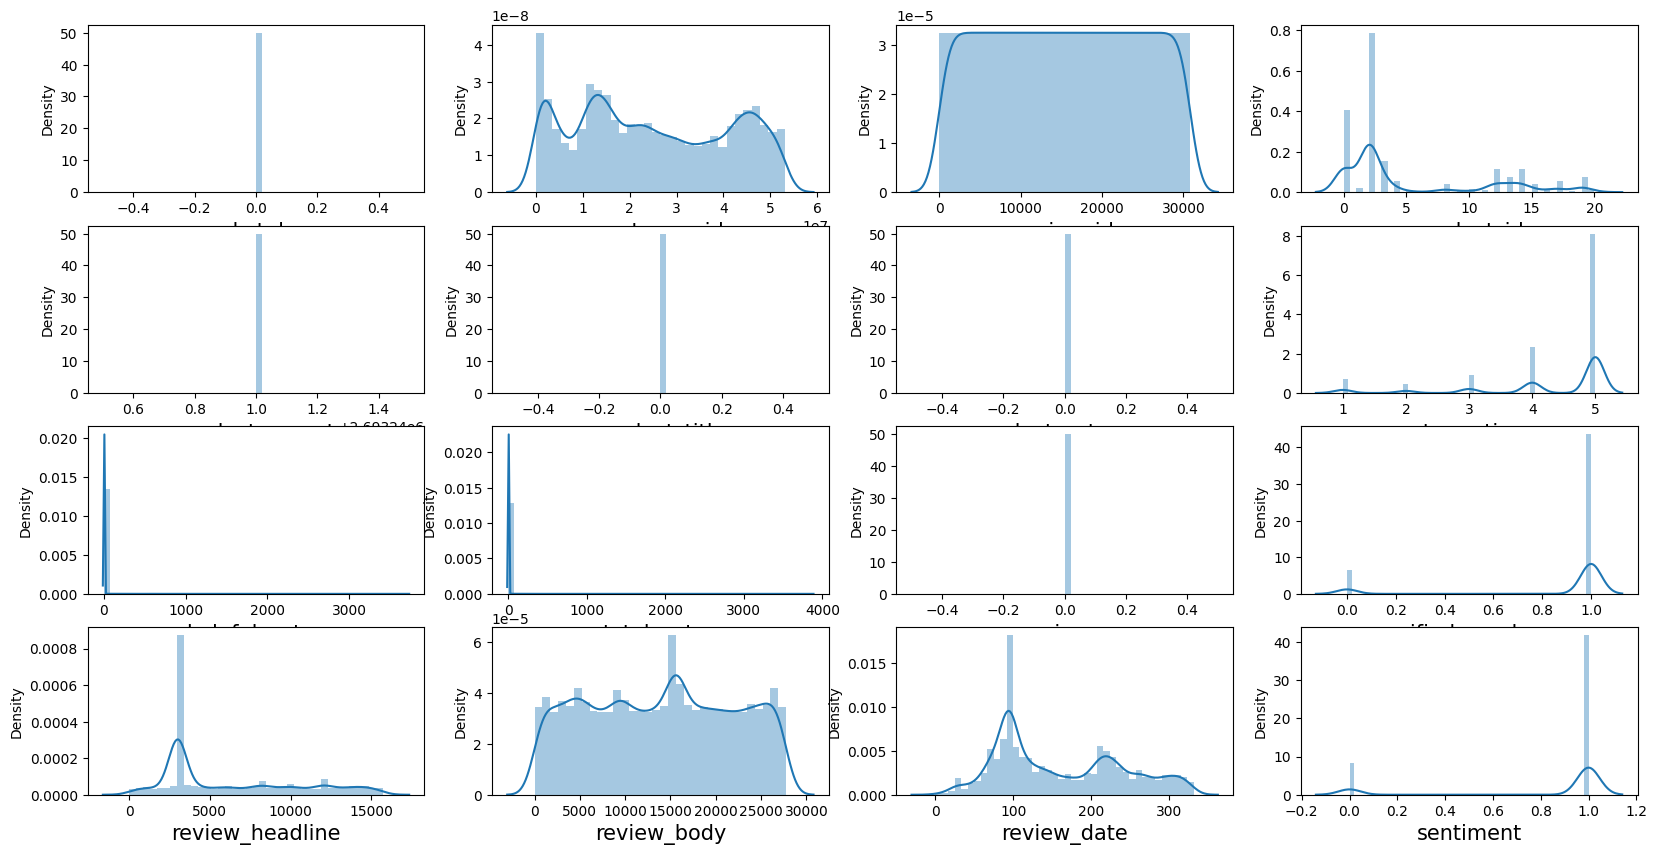

In [91]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber <= 18:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

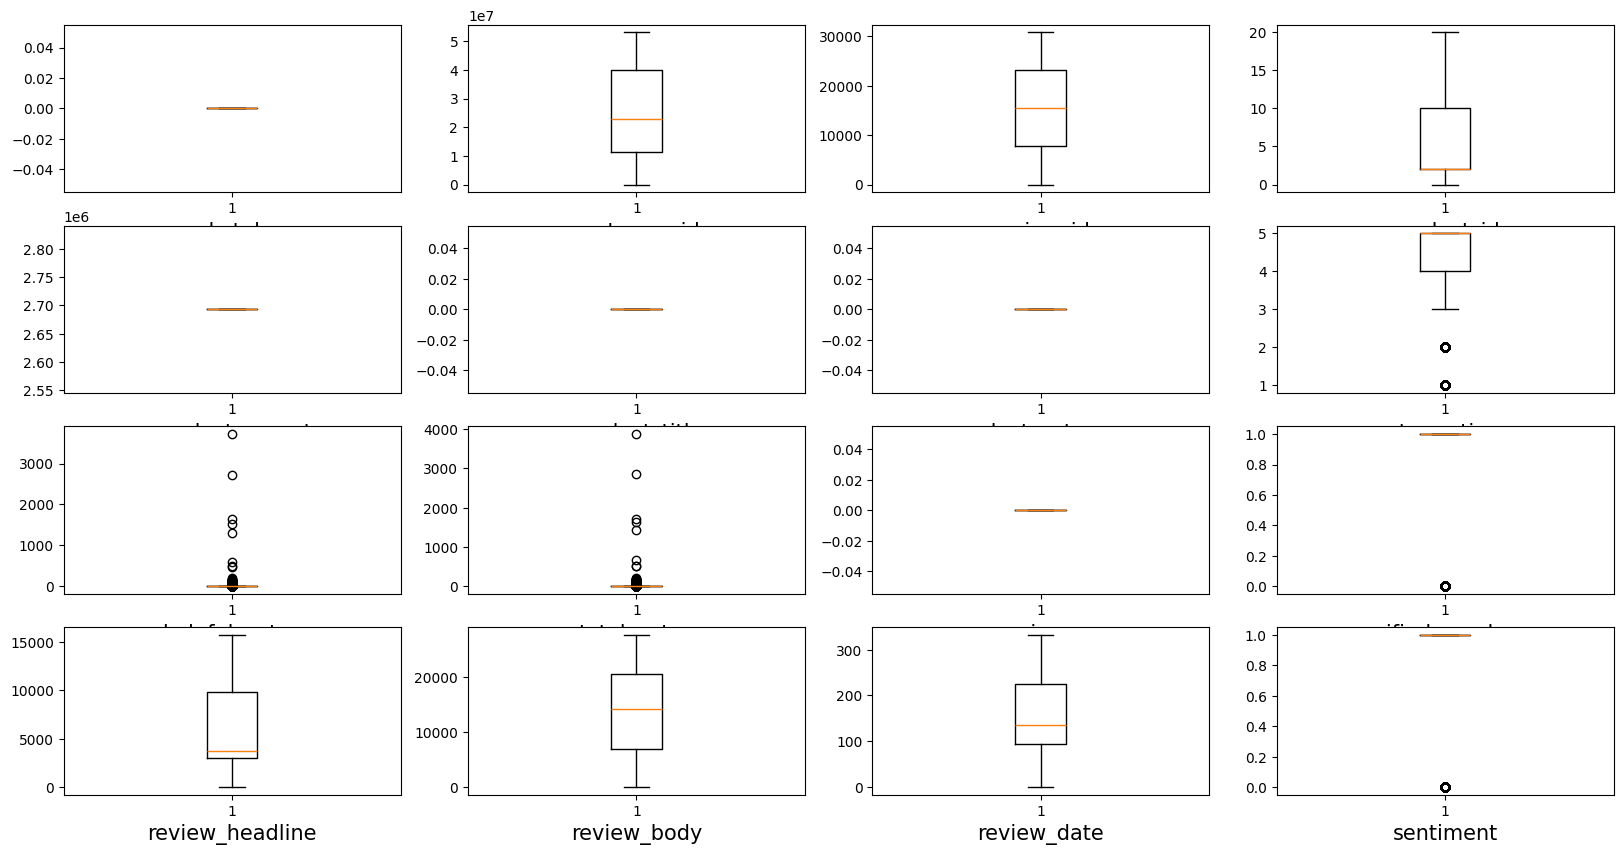

In [92]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber <= 18:
        ax = plt.subplot(4,4,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [93]:
# removing outliers using zscore

from scipy.stats import zscore

z_score = zscore(df[['helpful_votes','total_votes']])
    
abs_z_score = np.abs(z_score)
    
filter_entry = (abs_z_score < 2.8).all(axis=1)
    
df = df[filter_entry]
    
df.shape

(30818, 16)

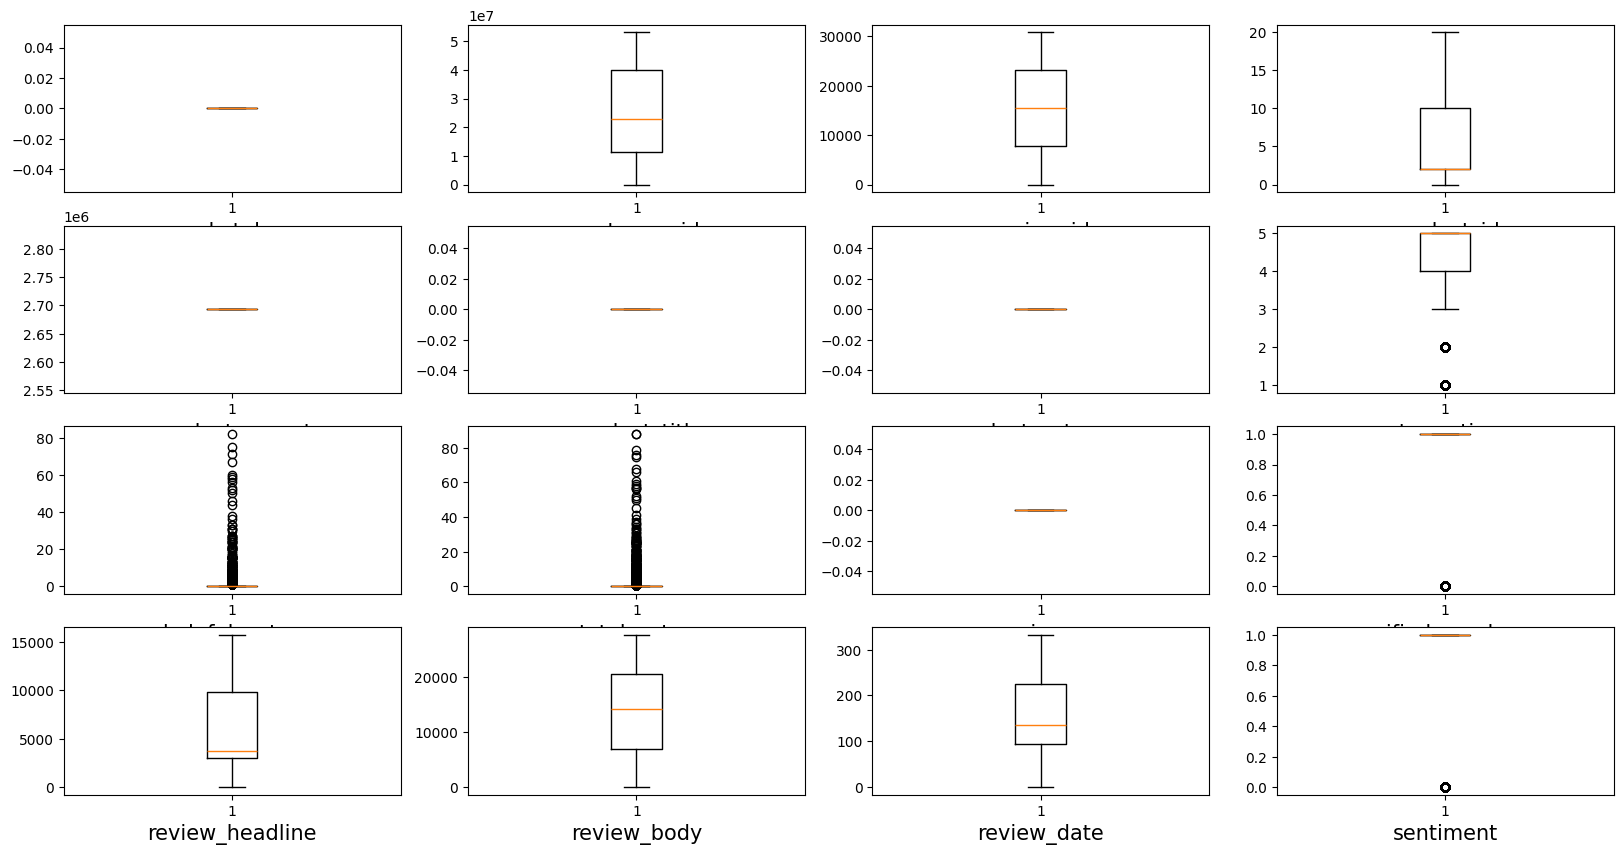

In [94]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber <= 18:
        ax = plt.subplot(4,4,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

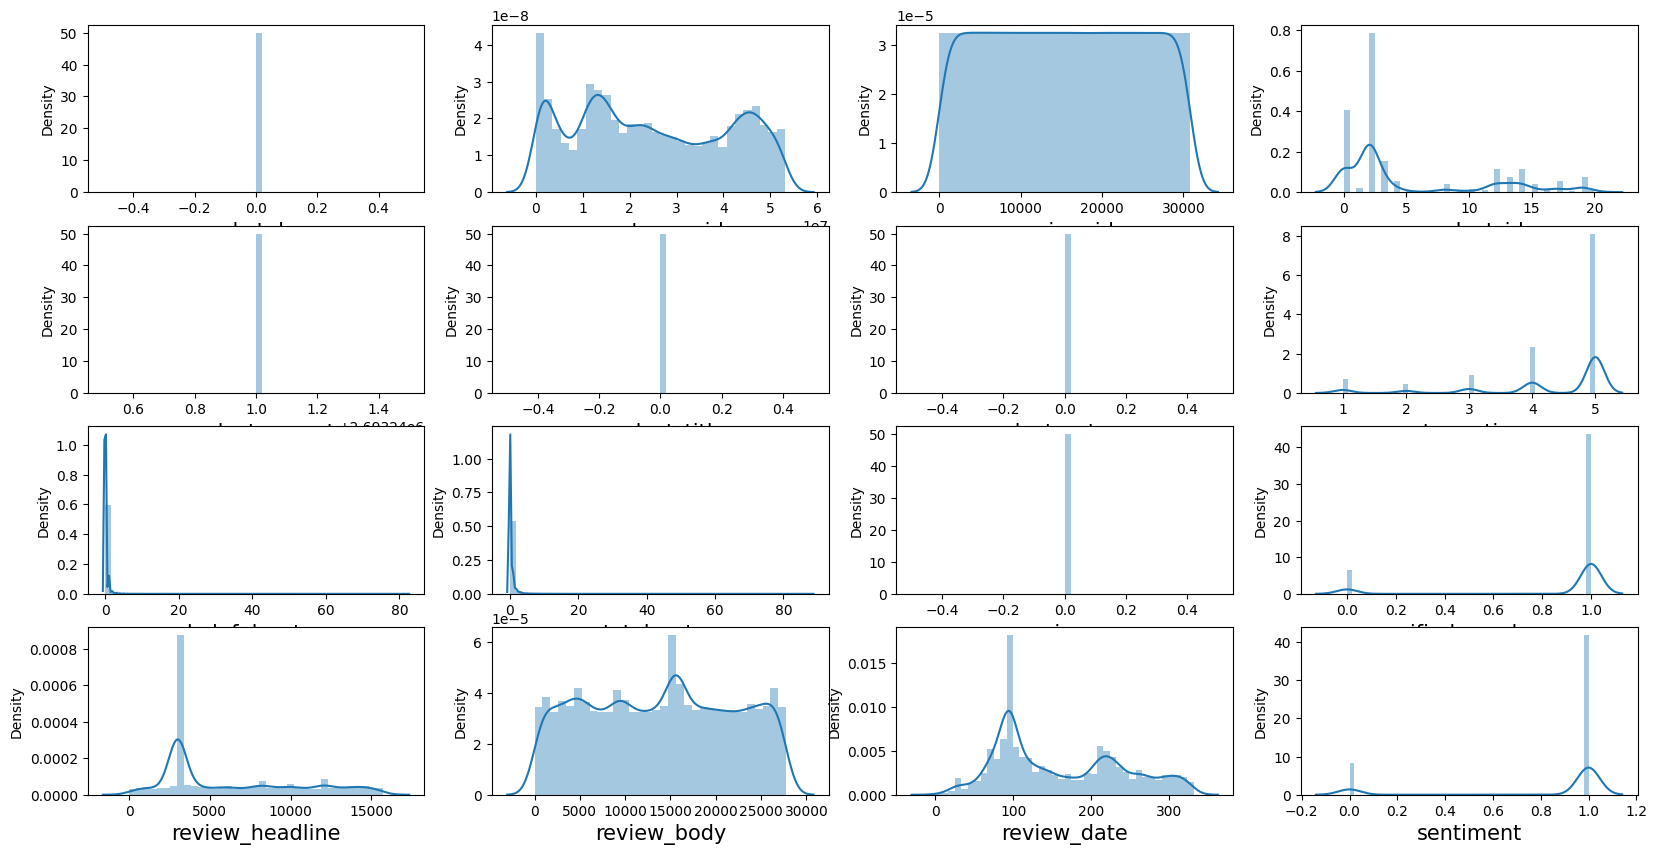

In [95]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber <= 18:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

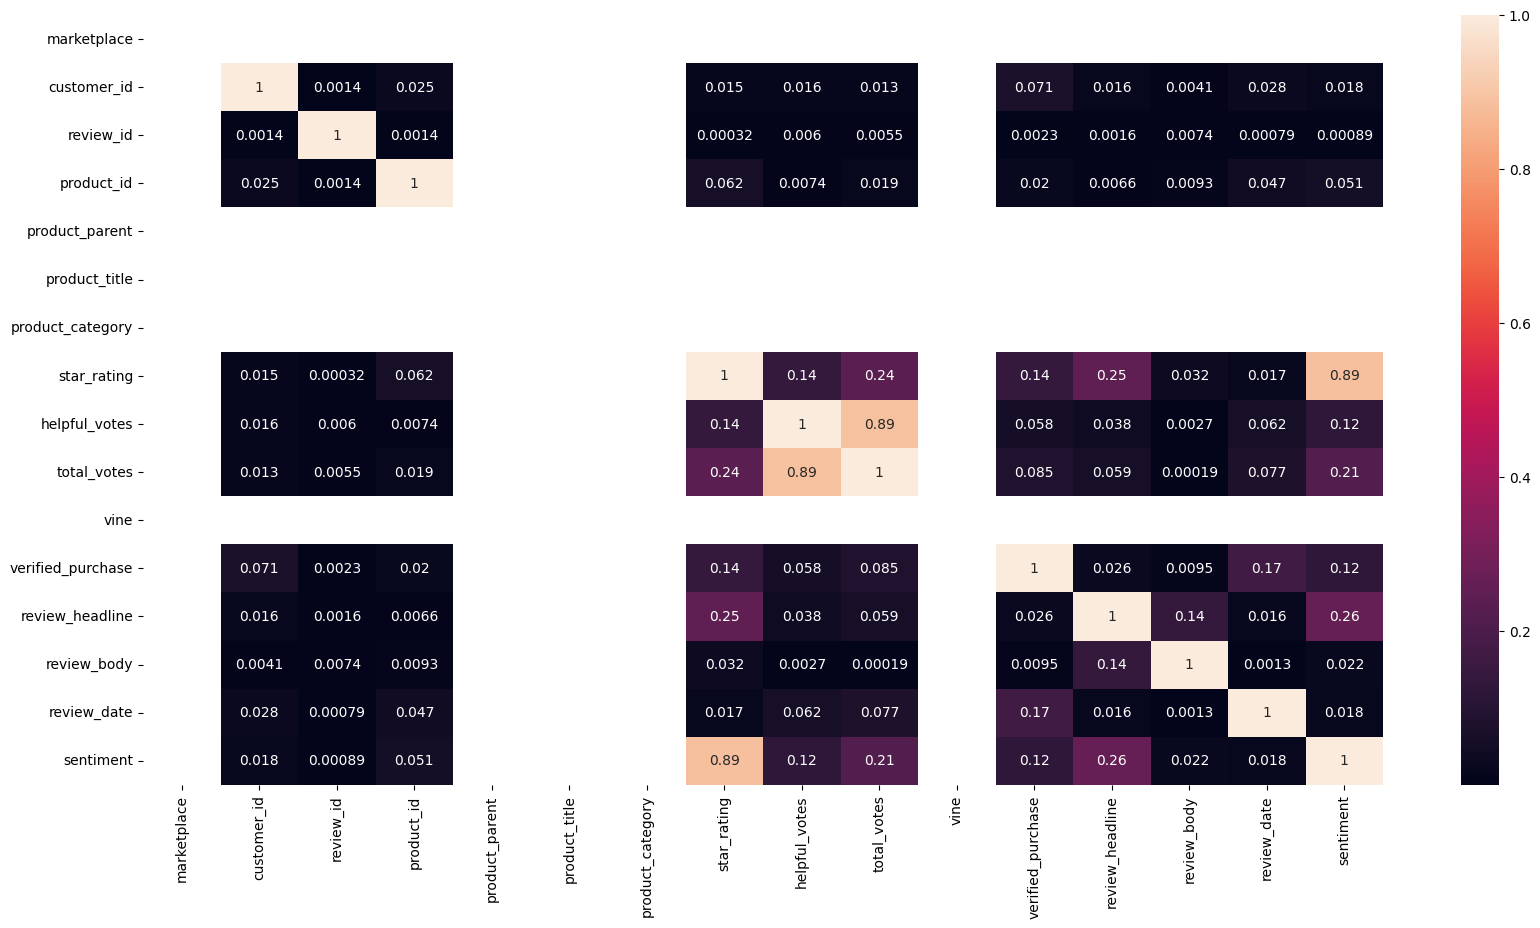

In [96]:
corr = df.corr().abs()

plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

plt.show()

In [97]:
x = df.drop(columns='sentiment')

y = df['sentiment']

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [105]:
lr_pred = lr.predict(x_test)

In [106]:
accuracy = accuracy_score(y_test,lr_pred)

accuracy

1.0

In [107]:
confusion_matrix(y_test,lr_pred)

array([[1073,    0],
       [   0, 5091]], dtype=int64)

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [110]:
dt_pred = dt.predict(x_test)

In [111]:
accuracy = accuracy_score(y_test,dt_pred)

accuracy

1.0

In [112]:
confusion_matrix(y_test,dt_pred)

array([[1073,    0],
       [   0, 5091]], dtype=int64)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [115]:
rf_pred = rf.predict(x_test)

In [116]:
accuracy = accuracy_score(y_test,rf_pred)

accuracy

1.0

In [117]:
confusion_matrix(y_test,rf_pred)

array([[1073,    0],
       [   0, 5091]], dtype=int64)